In [1]:
from PIL import Image
import numpy as np
import random
import cv2 as cv
import matplotlib.pyplot as plt
from ImageProcessor import ImageProcessor
import os

# 读取50张clean jpg图片
image_path = './clean_photos'
ImageProcessor = ImageProcessor(image_path, 50)
ImageProcessor.read_images()

# 随机的噪声污染这些图片
# 现在污染噪声的类型分为三种：椒盐噪声、高斯噪声、泊松噪声；10张图片只添加椒盐噪声，10张图片只添加高斯噪声，10张图片只添加泊松噪声，20张图片添加椒盐噪声、高斯噪声和泊松噪声
for i in range(10):
    salt_prob = random.random() * 0.01
    pepper_prob = random.random() * 0.01
    ImageProcessor.add_salt_pepper_noise(i, salt_prob, pepper_prob)


for i in range(10, 20):
    mean = 0
    sigma = random.uniform(0,10)
    ImageProcessor.add_gaussian_noise(i,mean,sigma)


for i in range(20, 30):
    ImageProcessor.add_poisson_noise(i)


for i in range(30, 50):
    salt_prob = random.random() * 0.01
    pepper_prob = random.random() * 0.01 
    mean = 0
    sigma = random.uniform(0,10)
    ImageProcessor.add_all_noises(i,salt_prob,pepper_prob,mean,sigma)

迭代次数为552


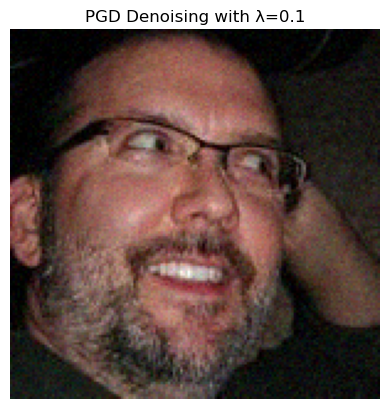

迭代次数为730


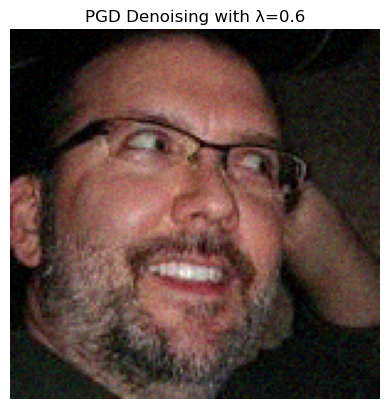

迭代次数为790


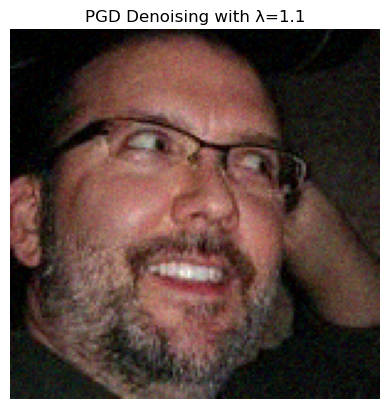

迭代次数为828


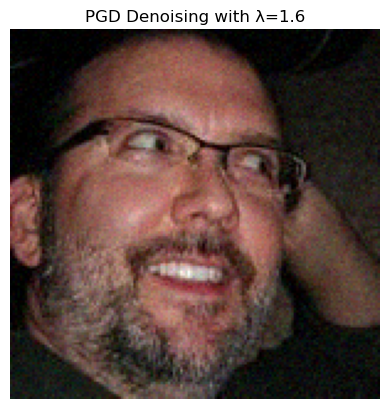

迭代次数为854


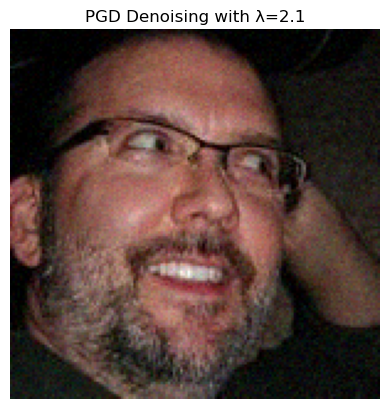

迭代次数为875


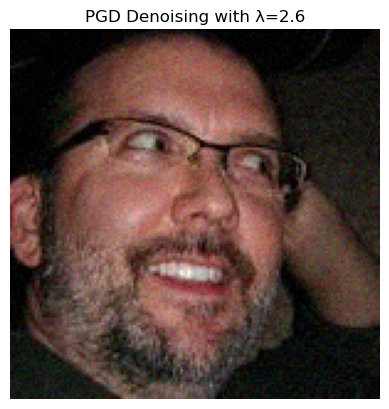

迭代次数为893


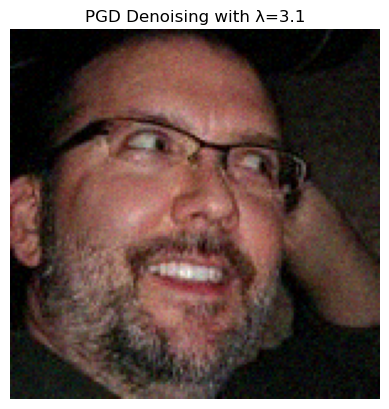

迭代次数为907


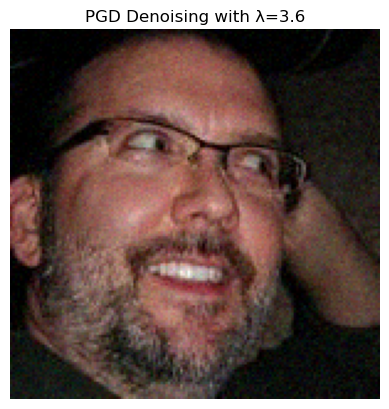

迭代次数为920


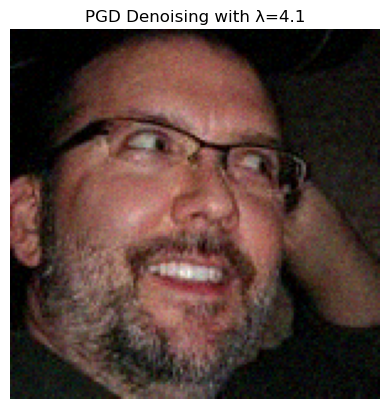

迭代次数为931


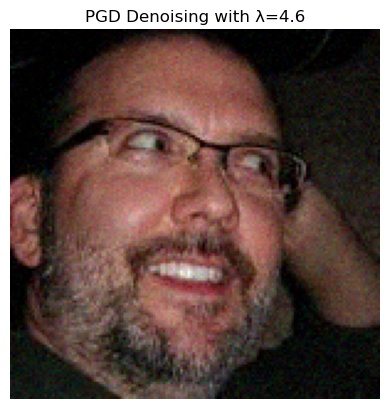

迭代次数为941


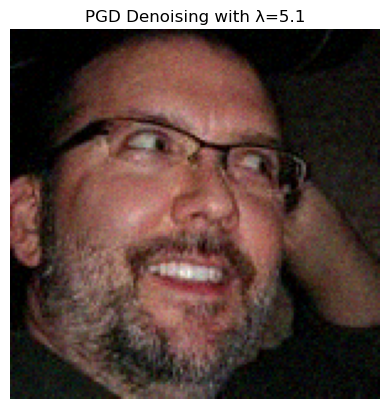

迭代次数为951


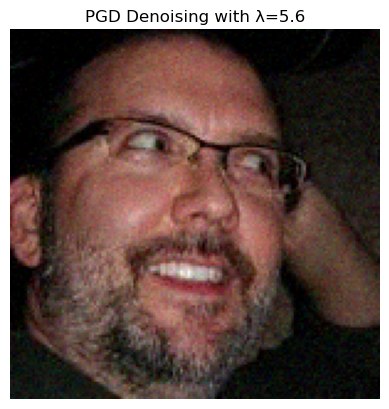

迭代次数为959


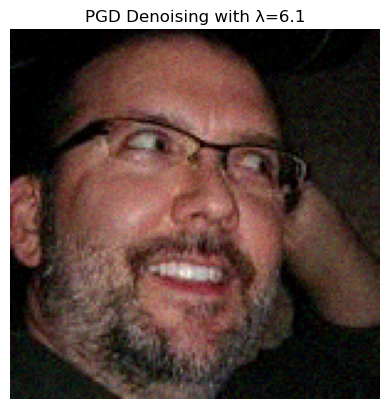

迭代次数为966


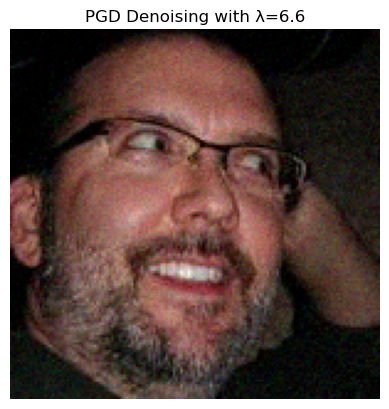

迭代次数为973


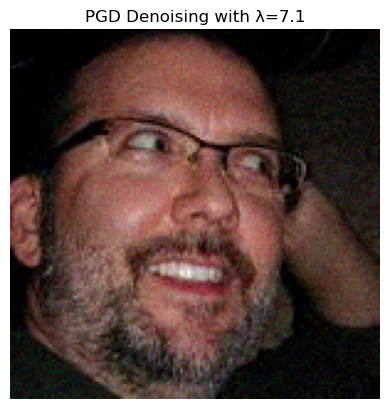

迭代次数为980


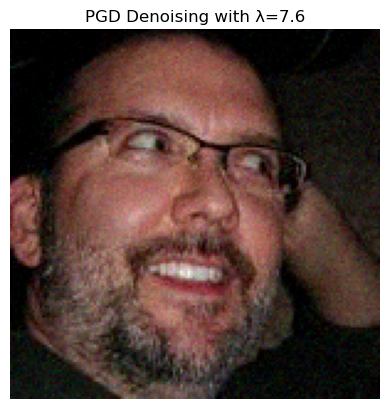

迭代次数为986


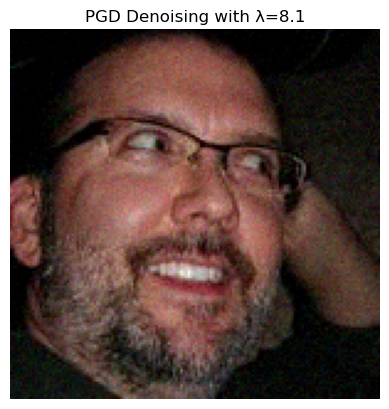

迭代次数为992


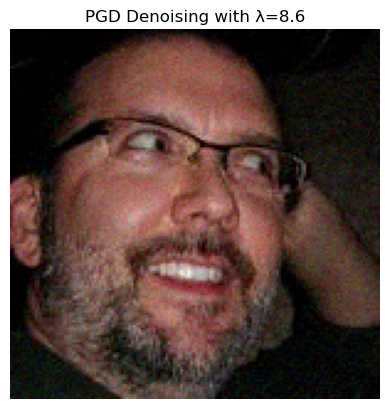

迭代次数为997


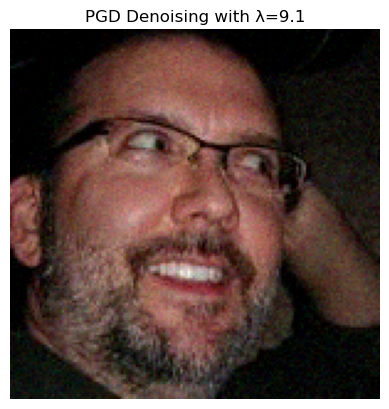

迭代次数为999


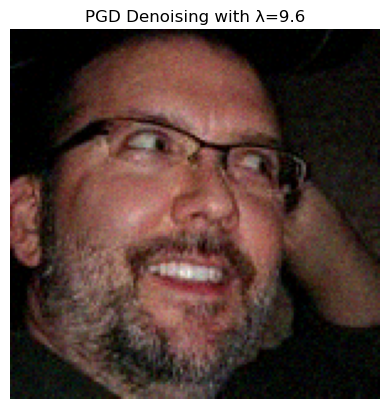

In [5]:
# PGD去噪
t = 0.01 # 步长
ii = 16
ImageProcessor.noisy_images[ii].show()
for lam in np.arange(0.1,10,0.5):
    denoised_image = ImageProcessor.PGD_denoising(ii, lam, t)
    plt.imshow(denoised_image)
    plt.title(f'PGD Denoising with λ={lam}')
    plt.axis('off')  # 隐藏坐标轴
    plt.show()


In [ ]:
# PGD去噪
lam = 0.4
t = 2
PGD_denoising_result = []
for i in range(1):
    PGD_denoising_result.append(ImageProcessor.PGD_denoising(i, lam, t))

图像的数值类型: uint8
通道 0 的值范围: 0 - 255
通道 1 的值范围: 0 - 255
通道 2 的值范围: 0 - 255
迭代次数为0


In [3]:
# ADMM去噪
AMDD_denoising_result = []
lam = 0.4
t1 = 100
t2 = 100
for i in range(2):
    AMDD_denoising_result.append(ImageProcessor.ADMM_denoising(i, lam, t1, t2, alpha_k=0.5))

/Users/zhaoqiyuan/Desktop/IdleData/计算成像与反问题/HW1-Computational Imaging/ImageProcessor.py:131: RuntimeWarning: invalid value encountered in cast
  u_k[i][j][k] = channel + lam * t1
/Users/zhaoqiyuan/Desktop/IdleData/计算成像与反问题/HW1-Computational Imaging/ImageProcessor.py:127: RuntimeWarning: invalid value encountered in cast
  u_k[i][j][k] = channel - lam * t1


KeyboardInterrupt: 

In [4]:
ii = 0
PGD_denoising_result[ii].show()
#AMDD_denoising_result[ii].show()
ImageProcessor.noisy_images[ii].show()

In [7]:
# PMG去噪
lam = 0.4
t = 150
ImageProcessor.PGM_denoising(29, lam, t).show()
ImageProcessor.noisy_images[29].show()

迭代次数为2
